Q1: Calculate variance, standard Deviation and IQR of Salary of Employees in HR and Marketing Department. 

Q2: What is the range of Experience in IT department?

Q3: Create a boxplot to display Experience of Each Department.

Q4: Which Features has highest Standard Deviation in the Dataset?

Q5 Calculate covariance between MPG and Horsepower of Vehicles from Car93 Dataset.

Q6. Find the top 5 pair of Features having Highest correlation in Cars93 Dataset

Q7: Draw Scatterplot for the 5 pairs selected in previous Question.

Q1: Nexa Tea

- Mean = 255
- Sd = 2.5
- Z Score = 255-250/2.5 = 2
- 2 SD Away = 95% Data
- So 95% Data should fall in 250-260 Gm's
- 2.5% data less than 250 Gms


Q2: % of students passing the Exam
- Mean = 42
- Sd = 8
- Z Score = 50-42/8 = 1
- 1 SD Away = 68% Data
- So 68% students should score between 34-50.
- 32 % students Score less than 34 or Greater than 50
- Since Normal Distribution is Symmentric 16% students will score more than 50%

Q3: Temperature between 39°C and 42°C
- Mean = 36
- Sd = 3
- Z Score_1 = 39-36/3 = 1
- Z Score_2 = 42-36/3 = 2
- 1 SD is 68% , 2 SD is 95%
- Data between 1 SD and 2 SD is= 95-68 = 27
- % of days expected to fall between 39-42 = 27/2 = 13.5%
 

In [ ]:
95-68

27

### Loading CARS93 and HR Datasets into pandas Dataframe:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# reading data into dataframe
cars_df = pd.read_csv('/content/drive/MyDrive/DataScience/cars93.csv')

# printing top 5 rows
cars_df.head()

,Manufacturer,Model,Type,Price,MPG.city,AirBags,Horsepower,Passengers,Rear.seat.room,Luggage.room
0,Acura,Integra,Small,3259500,25,Driver only,140,5,26.5,11.0
1,Acura,Legend,Midsize,6949500,18,Driver & Passenger,200,5,30.0,15.0
2,Audi,90,Compact,5965500,20,Driver only,172,5,28.0,14.0
3,Audi,100,Midsize,7728500,19,Driver & Passenger,172,6,31.0,17.0
4,BMW,535i,Midsize,6150000,22,Driver only,208,4,27.0,13.0


In [ ]:
# reading data into dataframe
hr_df = pd.read_csv('/content/drive/MyDrive/DataScience/Employee_HR.csv')

# printing top 5 rows
hr_df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


#### Q1: Variance, standard Deviation and IQR of Salary of Employees in HR and Marketing Department. 

In [ ]:
df_hr_mark = hr_df[hr_df['Department'].isin(['hr','marketing'])]
df_hr_mark.Department.value_counts()

marketing    858
hr           739
Name: Department, dtype: int64

In [ ]:
print("Variance: ",df_hr_mark.Salary_INR.var())
print("Std: ", df_hr_mark.Salary_INR.std())
print("75th percentile:{} \t25th Percentile:{}".format(df_hr_mark.Salary_INR.quantile(0.75), df_hr_mark.Salary_INR.quantile(0.25) ))
print("IQR:",df_hr_mark.Salary_INR.quantile(0.75) - df_hr_mark.Salary_INR.quantile(0.25))

Variance:  4348997776.990409
Std:  65946.9315206584
75th percentile:78284.0 	25th Percentile:25553.0
IQR: 52731.0


Q2: Range of Experience in IT department

In [ ]:
max_exp = hr_df[hr_df['Department']=='IT'].time_spent_company.max()
min_exp = hr_df[hr_df['Department']=='IT'].time_spent_company.min()
print("Max Exp {}\t Min Exp {}".format(max_exp, min_exp ))
print("Range: ",max_exp-min_exp)

Max Exp 10	 Min Exp 2
Range:  8


Q3: Create a boxplot to display Experience of Each Department.

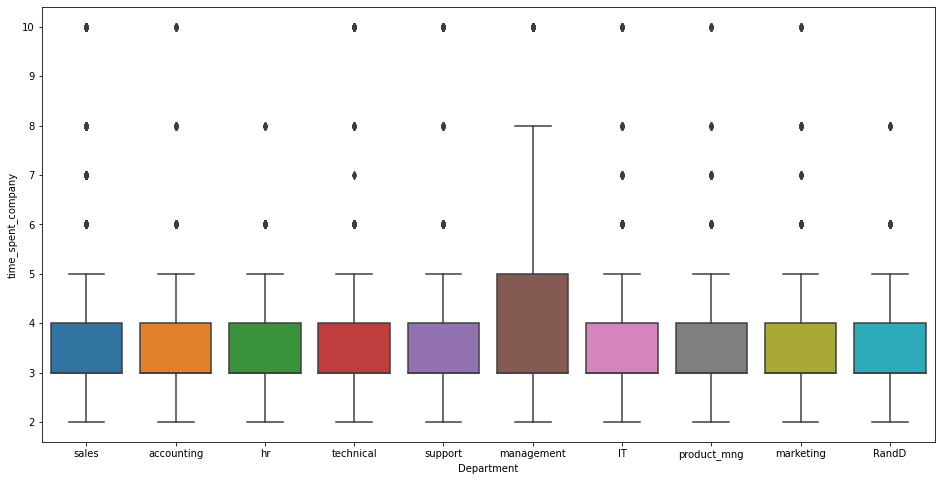

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (16,8))


sns.boxplot(x = 'Department', y = 'time_spent_company', data = hr_df )
plt.show()

Q4: Features has highest Standard Deviation in the Dataset

In [ ]:
hr_df.std()

EmpId                    4329.982679
Satisfaction                2.486307
Evaluation                  1.711691
number_of_projects          1.232592
average_montly_hours       49.943099
time_spent_company          1.460136
work_accident               0.351719
Promotion                   0.144281
Salary_INR              66486.116149
Churn                       0.425924
dtype: float64

In [ ]:
hr_df.std().max()

66486.11614875057

In [ ]:
hr_df.std().sort_values(ascending = False)

Salary_INR              66486.116149
EmpId                    4329.982679
average_montly_hours       49.943099
Satisfaction                2.486307
Evaluation                  1.711691
time_spent_company          1.460136
number_of_projects          1.232592
Churn                       0.425924
work_accident               0.351719
Promotion                   0.144281
dtype: float64

In [ ]:
hr_df.std().sort_values(ascending = False).index[0]

'Salary_INR'

Q5 covariance between MPG and Horsepower of Vehicles from Car93 Dataset.


In [ ]:
cars_df[['Horsepower', 'MPG.city']].cov()

,Horsepower,MPG.city
Horsepower,2743.078775,-197.979897
MPG.city,-197.979897,31.582281


In [ ]:
cov_val = cars_df[['Horsepower', 'MPG.city']].cov().iloc[0][1]
print("covariance between MPG and Horsepower: ", cov_val)

covariance between MPG and Horsepower:  -197.9798971482001


Q6: The top 5 pair of Features having Highest correlation in Cars93 Dataset

In [ ]:
cars_df.corr()

,Price,MPG.city,Horsepower,Passengers,Rear.seat.room,Luggage.room
Price,1.000000,-0.594562,0.788218,0.057860,0.311499,0.366569
MPG.city,-0.594562,1.000000,-0.672636,-0.416856,-0.384347,-0.494894
Horsepower,0.788218,-0.672636,1.000000,0.009264,0.256732,0.359217
Passengers,0.057860,-0.416856,0.009264,1.000000,0.694134,0.653317
Rear.seat.room,0.311499,-0.384347,0.256732,0.694134,1.000000,0.651968
Luggage.room,0.366569,-0.494894,0.359217,0.653317,0.651968,1.000000


In [ ]:
cars_df.corr().abs()

,Price,MPG.city,Horsepower,Passengers,Rear.seat.room,Luggage.room
Price,1.000000,0.594562,0.788218,0.057860,0.311499,0.366569
MPG.city,0.594562,1.000000,0.672636,0.416856,0.384347,0.494894
Horsepower,0.788218,0.672636,1.000000,0.009264,0.256732,0.359217
Passengers,0.057860,0.416856,0.009264,1.000000,0.694134,0.653317
Rear.seat.room,0.311499,0.384347,0.256732,0.694134,1.000000,0.651968
Luggage.room,0.366569,0.494894,0.359217,0.653317,0.651968,1.000000


In [ ]:
cars_df.corr().abs().unstack()

Price           Price             1.000000
                MPG.city          0.594562
                Horsepower        0.788218
                Passengers        0.057860
                Rear.seat.room    0.311499
                Luggage.room      0.366569
MPG.city        Price             0.594562
                MPG.city          1.000000
                Horsepower        0.672636
                Passengers        0.416856
                Rear.seat.room    0.384347
                Luggage.room      0.494894
Horsepower      Price             0.788218
                MPG.city          0.672636
                Horsepower        1.000000
                Passengers        0.009264
                Rear.seat.room    0.256732
                Luggage.room      0.359217
Passengers      Price             0.057860
                MPG.city          0.416856
                Horsepower        0.009264
                Passengers        1.000000
                Rear.seat.room    0.694134
           

Remove useless corr with val 1 for same col such as: price, price

In [ ]:
labels_to_drop = []
for i in cars_df.corr().columns:
  labels_to_drop.append((i,i))
labels_to_drop 

[('Price', 'Price'),
 ('MPG.city', 'MPG.city'),
 ('Horsepower', 'Horsepower'),
 ('Passengers', 'Passengers'),
 ('Rear.seat.room', 'Rear.seat.room'),
 ('Luggage.room', 'Luggage.room')]

In [ ]:
unstacked_corr = cars_df.corr().abs().unstack()
unstacked_corr_filter = unstacked_corr.drop(labels_to_drop, axis = 0)
unstacked_corr_filter

Price           MPG.city          0.594562
                Horsepower        0.788218
                Passengers        0.057860
                Rear.seat.room    0.311499
                Luggage.room      0.366569
MPG.city        Price             0.594562
                Horsepower        0.672636
                Passengers        0.416856
                Rear.seat.room    0.384347
                Luggage.room      0.494894
Horsepower      Price             0.788218
                MPG.city          0.672636
                Passengers        0.009264
                Rear.seat.room    0.256732
                Luggage.room      0.359217
Passengers      Price             0.057860
                MPG.city          0.416856
                Horsepower        0.009264
                Rear.seat.room    0.694134
                Luggage.room      0.653317
Rear.seat.room  Price             0.311499
                MPG.city          0.384347
                Horsepower        0.256732
           

In [ ]:
top5_corr = unstacked_corr_filter.sort_values(ascending = False)[:10:2]
top5_corr

Price         Horsepower        0.788218
Passengers    Rear.seat.room    0.694134
MPG.city      Horsepower        0.672636
Luggage.room  Passengers        0.653317
              Rear.seat.room    0.651968
dtype: float64

In [ ]:
top5_corr.index

MultiIndex([(       'Price',     'Horsepower'),
            (  'Passengers', 'Rear.seat.room'),
            (    'MPG.city',     'Horsepower'),
            ('Luggage.room',     'Passengers'),
            ('Luggage.room', 'Rear.seat.room')],
           )

In [ ]:
top5_corr

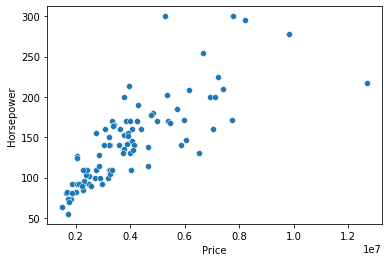

Correlate between Price and Horsepower is 0.7882175778513332




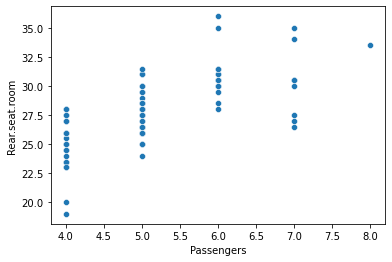

Correlate between Passengers and Rear.seat.room is 0.6941337338026606




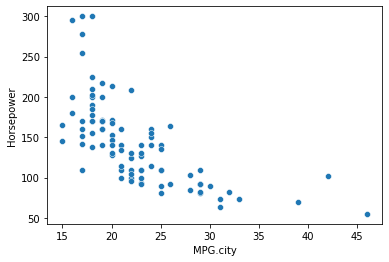

Correlate between MPG.city and Horsepower is -0.6726361507957245




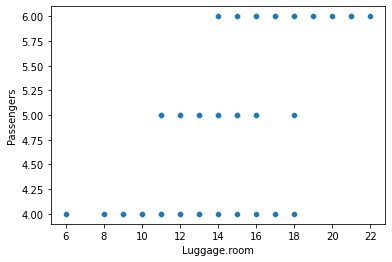

Correlate between Luggage.room and Passengers is 0.6533165580120929




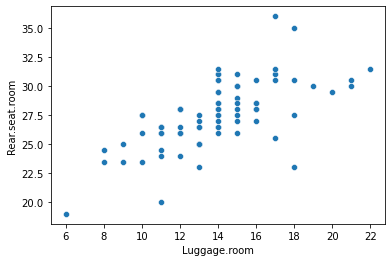

Correlate between Luggage.room and Rear.seat.room is 0.651967509653197




In [ ]:
for i,j in top5_corr.index:
  sns.scatterplot(x = i , y = j, data = cars_df)
  plt.show()
  print("Correlate between {} and {} is {}\n\n".format(i, j, cars_df.corr()[i][j]))
